# Genetic algorithm

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy
from random import sample

### Define a benchmark problem

In [9]:
def costFunction(x):
    return sum(x**2)

### Define hyperparameters

In [10]:
nGene = 10 
geneDomain = [-5 , 5]

nPop = 100            #number of parents/population
nCrossover = 70       #numbrt of crossover/couples ( an even number) / parents candidate
##crossover hyperparameter
alpha = 0.5


nMutation = 20        #number of mutations

nGenerations = 200



### Define GA code

In [11]:
class Agent:
    def __init__ (self , genome = None):
        if genome :
            self.genome = np.array(genome)
        else:
            self.genome = np.random.uniform(geneDomain[0] , geneDomain[1] , nGene)
            
        #compute the f(x) = fitness
        self.fitness = costFunction(self.genome)
    
    
    def blend_crossover (self , other):
        gamma = np.random.uniform (-alpha , 1+alpha , nGene)
        offspring1 = gamma * self.genome  + (1-gamma) * other.genome
        offspring2 = gamma * other.genome + (1-gamma) * self.genome
        
        
        #bound offspring's genes to the defined domain
        offspring1[offspring1 > geneDomain[1]] = geneDomain[1]
        offspring1[offspring1 < geneDomain[0]] = geneDomain[0]
        offspring2[offspring2 > geneDomain[1]] = geneDomain[1]
        offspring2[offspring2 < geneDomain[0]] = geneDomain[0]
    
        return [ Agent(list(offspring1)) , Agent(list(offspring2))]
    
    def mutate(self):
        temp_genome = deepcopy(self.genome)
        # increasing rhe number 10 means more exploitation (it's hyper parameter)
        sigma = (geneDomain[1] - geneDomain[0]) / 10 
        temp_genome[np.random.randint(0 , nGene)] += np.random.normal(0, sigma)  
        
        
        #bound offspring's genes to the defined domain
        temp_genome[temp_genome > geneDomain[1]] = geneDomain[1]
        temp_genome[temp_genome < geneDomain[0]] = geneDomain[0]
        
        return Agent(list(temp_genome))
  

## Define sort operator

In [12]:
def sort_population(population):
    return sorted(population , key = lambda t : t.fitness)

## Initialization

In [13]:
#population (parent)
pop = [Agent() for _ in range(nPop)]
best_records = []

## Generations

In [17]:
for itr in range (nGenerations):
    # random selection & crossover
    pop_crossover = []
    candidates = sample(pop , nCrossover)
    
    for i in range(0 , nCrossover , 2):
        parent1 = candidates[i]
        parent2 = candidates[i+1]
        
        pop_crossover +=  parent1.blend_crossover(parent2) #append tp list
        
    #random selection $ mutation
    pop_mutation = []
    candidates = sample(pop, nMutation)
    for i in candidates:
        pop_mutation.append(i.mutate())
        
    
    #merge and sort and truncate
    pop_overall = pop + pop_crossover + pop_mutation
    pop_overall = sort_population(pop_overall)
    pop = pop_overall[:nPop]
    
    
    #save the best result and show info
    best_records.append(pop[0])
    print (f" Generation  {itr} : \n Best fitness {pop[0].fitness} \n best Genom {pop[0].genome} \n { '-' * 30} ")


 Generation  0 : 
 Best fitness 4.663991159616066e-16 
 best Genom [-7.18494112e-09 -6.04915132e-09 -4.54195083e-09 -7.07190744e-09
  1.39499205e-09  1.43622950e-08 -7.38723222e-09 -4.73466412e-10
  3.93433858e-09 -5.38947141e-09] 
 ------------------------------ 
 Generation  1 : 
 Best fitness 4.663991159616066e-16 
 best Genom [-7.18494112e-09 -6.04915132e-09 -4.54195083e-09 -7.07190744e-09
  1.39499205e-09  1.43622950e-08 -7.38723222e-09 -4.73466412e-10
  3.93433858e-09 -5.38947141e-09] 
 ------------------------------ 
 Generation  2 : 
 Best fitness 4.663991159616066e-16 
 best Genom [-7.18494112e-09 -6.04915132e-09 -4.54195083e-09 -7.07190744e-09
  1.39499205e-09  1.43622950e-08 -7.38723222e-09 -4.73466412e-10
  3.93433858e-09 -5.38947141e-09] 
 ------------------------------ 
 Generation  3 : 
 Best fitness 4.663991159616066e-16 
 best Genom [-7.18494112e-09 -6.04915132e-09 -4.54195083e-09 -7.07190744e-09
  1.39499205e-09  1.43622950e-08 -7.38723222e-09 -4.73466412e-10
  3.9343

 ------------------------------ 
 Generation  100 : 
 Best fitness 1.477744823147506e-23 
 best Genom [-8.31241121e-13 -1.79568116e-12  1.08431448e-13 -1.16287907e-12
 -2.12724824e-12  1.14503383e-12  9.53282350e-13  1.52545717e-12
  6.41494042e-13  1.20006287e-13] 
 ------------------------------ 
 Generation  101 : 
 Best fitness 1.0051490600609531e-23 
 best Genom [-2.18238879e-13 -1.50165453e-12 -2.21749814e-13 -1.17430322e-12
  9.69876462e-14 -5.43098775e-13  2.21708054e-12 -5.98024029e-13
  8.53274237e-13 -1.23354675e-13] 
 ------------------------------ 
 Generation  102 : 
 Best fitness 6.0160944340460585e-24 
 best Genom [ 1.98872964e-14 -1.54982579e-12  2.49172382e-13 -1.29180335e-12
 -9.67185525e-13 -4.79749993e-13  5.15278290e-13  2.83924327e-13
  4.28306635e-13  4.33263177e-13] 
 ------------------------------ 
 Generation  103 : 
 Best fitness 6.0160944340460585e-24 
 best Genom [ 1.98872964e-14 -1.54982579e-12  2.49172382e-13 -1.29180335e-12
 -9.67185525e-13 -4.79749993e

 Generation  199 : 
 Best fitness 1.9462759820539907e-31 
 best Genom [ 1.65047914e-16  2.47150655e-16  1.06564283e-16  8.70876089e-18
  1.94782041e-16  1.71153124e-17  6.40201494e-17  1.88746728e-16
 -8.52621338e-17 -9.82091289e-17] 
 ------------------------------ 


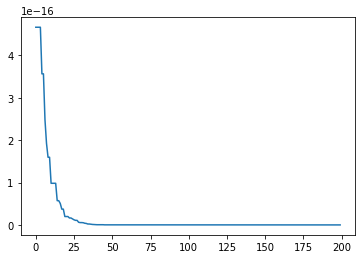

In [18]:
plt.plot([i.fitness for i in best_records])
plt.show()